In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, mean_squared_error
import xgboost as xgb
from xgboost import plot_tree

In [119]:
df = pd.read_csv(r"C:\Users\vkotr\Python Projects\HackUTD2023\AnalyzedHomeBuyerInfo.csv")
df

,ID,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,MonthlyDebt,DTI,FEDTI,Approved
0,1,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778,0.88,2068.90,0.666742,0.363487,N
1,2,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546,0.91,3231.00,1.099354,0.762164,N
2,3,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736,0.92,3219.64,0.688546,0.487092,N
3,4,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1723.86,761,0.93,2763.86,0.294183,0.171383,R-LTV
4,5,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615,0.95,4313.39,1.792764,1.241642,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,4329.0,483.0,473.0,306.0,440365.0,123302.20,317062.80,1513.71,754,0.72,2775.71,0.641190,0.349667,N
9996,9997,7037.0,465.0,408.0,338.0,312762.0,56297.16,256464.84,1537.64,656,0.82,2748.64,0.390598,0.218508,N
9997,9998,9086.0,284.0,352.0,288.0,284712.0,56942.40,227769.60,1671.29,569,0.80,2595.29,0.285636,0.183941,N
9998,9999,9655.0,443.0,365.0,407.0,387465.0,65869.05,321595.95,2359.76,700,0.83,3574.76,0.370250,0.244408,N


In [120]:
df['Numeric Approved'] = pd.factorize(df['Approved'])[0]
# df.loc[["Approved","Numeric Approved"]]
df.drop(columns=["Approved","ID"], inplace=True)
# df[["Numeric Approved","Approved"]].value_counts()


In [121]:
df

,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,MonthlyDebt,DTI,FEDTI,Numeric Approved
0,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778,0.88,2068.90,0.666742,0.363487,0
1,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546,0.91,3231.00,1.099354,0.762164,0
2,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736,0.92,3219.64,0.688546,0.487092,0
3,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1723.86,761,0.93,2763.86,0.294183,0.171383,1
4,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615,0.95,4313.39,1.792764,1.241642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4329.0,483.0,473.0,306.0,440365.0,123302.20,317062.80,1513.71,754,0.72,2775.71,0.641190,0.349667,0
9996,7037.0,465.0,408.0,338.0,312762.0,56297.16,256464.84,1537.64,656,0.82,2748.64,0.390598,0.218508,0
9997,9086.0,284.0,352.0,288.0,284712.0,56942.40,227769.60,1671.29,569,0.80,2595.29,0.285636,0.183941,0
9998,9655.0,443.0,365.0,407.0,387465.0,65869.05,321595.95,2359.76,700,0.83,3574.76,0.370250,0.244408,0


In [122]:

X = df.drop(columns=['Numeric Approved'], inplace=False)
Y = df['Numeric Approved']

split = int(len(df)*0.8) ### 80% train 20% test

X_Train = X.iloc[:split]
X_Test = X.iloc[split:]

Y_Train = Y.iloc[:split]
Y_Test = Y.iloc[split:]

n_estimators=100
max_depth=100
learning_rate=0.01
random_state=4
alpha=10
gamma=10

## Lower max depth and higher n_estimaters makes the model better.
# clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=4)
# clf = lightgbm.LGBMClassifier(learning_rate=0.1, n_estimators=500, max_depth=5, random_state=4) # create a GBM model with some hyperparameters # max_depth=5
clf = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=random_state, alpha=alpha, gamma=gamma)
clf = clf.fit(X_Train, Y_Train)
# Get the feature importance scores
importance = clf.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importance)[::-1]

# Get the column names of the selected features as a list
selected_col_names = X_Train.columns[indices].tolist()

# Print the column names of the selected features
print("Feature Importance:")
for i in range(len(selected_col_names)):
    print(f"{i + 1}. {selected_col_names[i]} ({importance[indices[i]]})")


Feature Importance:
1. DTI (0.3733674883842468)
2. CreditScore (0.27039608359336853)
3. LTV (0.2198125123977661)
4. GrossMonthlyIncome (0.08880604803562164)
5. FEDTI (0.026404263451695442)
6. DownPayment (0.0212135910987854)
7. MonthlyDebt (0.0)
8. MonthlyMortgagePayment (0.0)
9. LoanAmount (0.0)
10. AppraisedValue (0.0)
11. StudentLoanPayments (0.0)
12. CarPayment (0.0)
13. CreditCardPayment (0.0)


<Axes: >

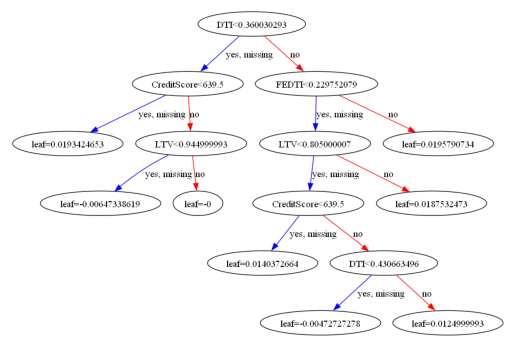

In [123]:
# plotting tree

plot_tree(clf)

In [124]:
Y_pred = clf.predict(X_Test)

print(classification_report(Y_Test, Y_pred))

print(f"mse: {mean_squared_error(Y_Test, Y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1538
           1       0.99      1.00      0.99       227
           2       1.00      1.00      1.00       181
           3       0.98      1.00      0.99        54

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

mse: 0.006


In [126]:
df = df[df["Numeric Approved"] != 0]

df

,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,MonthlyDebt,DTI,FEDTI,Numeric Approved
3,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1723.860000,761,0.93,2763.860000,0.294183,0.171383,1
5,9128.0,219.0,424.0,220.0,403922.0,117137.38,286784.62,1719.420000,661,0.71,2582.420000,0.282912,0.188368,2
6,8717.0,249.0,363.0,395.0,365483.0,73096.60,292386.40,1232.710000,811,0.80,2239.710000,0.256936,0.141414,2
7,8194.0,315.0,353.0,303.0,269907.0,72874.89,197032.11,1310.860000,648,0.73,2281.860000,0.278479,0.159978,2
12,8815.0,381.0,355.0,358.0,447858.0,62700.12,385157.88,2440.825000,733,0.86,3534.825000,0.358663,0.234556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,9033.0,364.0,351.0,347.0,261617.0,41858.72,219758.28,1267.174167,763,0.84,2329.174167,0.233716,0.116147,1
9967,9684.0,392.0,389.0,232.0,294405.0,32384.55,262020.45,1350.027500,847,0.89,2363.027500,0.218679,0.114074,1
9968,8666.0,338.0,418.0,257.0,361264.0,25288.48,335975.52,1905.053333,765,0.93,2918.053333,0.301985,0.185091,1
9969,5861.0,391.0,478.0,329.0,414806.0,120293.74,294512.26,1241.680000,805,0.71,2439.680000,0.416257,0.211855,3


In [132]:
X = df.drop(columns=["MonthlyMortgagePayment"], inplace=False)
Y = df['MonthlyMortgagePayment']

split = int(len(df)*0.9) ### 80% train 20% test

X_Train = X.iloc[:split]
X_Test = X.iloc[split:]

Y_Train = Y.iloc[:split]
Y_Test = Y.iloc[split:]

n_estimators=100
max_depth=100
learning_rate=0.01
random_state=4
alpha=10
gamma=10

## Lower max depth and higher n_estimaters makes the model better.
# clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=4)
# clf = lightgbm.LGBMClassifier(learning_rate=0.1, n_estimators=500, max_depth=5, random_state=4) # create a GBM model with some hyperparameters # max_depth=5
clf = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=random_state, alpha=alpha, gamma=gamma)
clf = clf.fit(X_Train, Y_Train)
# Get the feature importance scores
importance = clf.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importance)[::-1]

# Get the column names of the selected features as a list
selected_col_names = X_Train.columns[indices].tolist()

# Print the column names of the selected features
print("Feature Importance:")
for i in range(len(selected_col_names)):
    print(f"{i + 1}. {selected_col_names[i]} ({importance[indices[i]]})")


Feature Importance:
1. MonthlyDebt (0.931713342666626)
2. CreditCardPayment (0.017567893490195274)
3. StudentLoanPayments (0.015241079032421112)
4. LoanAmount (0.013906219974160194)
5. LTV (0.008970009163022041)
6. CreditScore (0.008229750208556652)
7. FEDTI (0.0036195521242916584)
8. CarPayment (0.0007521716761402786)
9. Numeric Approved (0.0)
10. DTI (0.0)
11. DownPayment (0.0)
12. AppraisedValue (0.0)
13. GrossMonthlyIncome (0.0)


In [133]:
Y_pred = clf.predict(X_Test)

# print(classification_report(Y_Test, Y_pred))
print(Y_Test,list(Y_pred))

print(f"mse: {mean_squared_error(Y_Test, Y_pred)}")


9048    1271.350000
9052    2135.033333
9056    1951.601667
9058    2117.427500
9061    1396.650000
           ...     
9965    1267.174167
9967    1350.027500
9968    1905.053333
9969    1241.680000
9993    1398.070000
Name: MonthlyMortgagePayment, Length: 219, dtype: float64 [744.37054, 1278.3434, 1175.6292, 1363.7167, 913.9889, 568.6591, 567.5555, 586.87683, 722.7646, 1215.4158, 582.57324, 1227.584, 808.6463, 639.14087, 1207.8918, 1085.4447, 814.6748, 753.35004, 585.0574, 758.9207, 1167.0165, 1018.49347, 1516.2856, 674.1374, 827.1292, 831.4991, 570.1088, 909.8663, 613.2806, 653.5404, 792.3093, 969.8079, 1110.666, 1184.2433, 1046.5316, 915.00476, 763.42163, 644.3967, 971.9503, 877.64105, 1354.793, 1117.1967, 773.71173, 1002.251, 520.77594, 1272.7472, 872.5716, 568.4394, 1282.2874, 1521.2433, 1141.4216, 616.5379, 732.4021, 646.7148, 730.48157, 1038.8967, 1321.2267, 1170.7959, 1214.8865, 634.07477, 1085.4447, 1046.1039, 1143.6467, 1220.0908, 1200.8268, 1085.4447, 850.6567, 827.9962, 80

In [134]:
# Import the library
from sklearn.linear_model import LinearRegression

# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X_Train, Y_Train)

# Make predictions using the model
y_pred = model.predict(Y_Test)

# Get the R-squared score of the model on the test set
r2 = model.score(y_pred, Y_Test)
print(r2)

c:\Users\vkotr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1271.35       2135.03333333 1951.60166667 2117.4275     1396.65
  880.69        837.82        947.4        1164.305      1992.04
  837.81       2136.51416667 1220.         1133.28       2062.04666667
 1759.4        1352.13       1135.99833333  870.7        1132.94
 1745.5625     1635.57       2558.44583333 1169.08       1199.39666667
 1390.50666667  786.75       1519.67       1007.61       1027.18
 1293.47       1469.66416667 1898.28583333 1916.78833333 1793.64333333
 1463.5475     1163.71333333 1051.14       1499.59       1377.79
 2039.28416667 1668.77083333 1316.74       1532.71        730.01
 2097.27       1377.84        875.77       2141.30583333 2638.32833333
 1863.80166667  859.47       1150.26       1129.78       1034.05666667
 1788.05833333 2244.28083333 1946.85583333 1984.68083333  944.65
 1792.9        1748.82       1762.045      1776.78       2025.78916667
 1735.9375     1332.65083333 1312.05       1301.12666667 1237.44
 1903.54916667 1180.75       2156.15166667 1644.96       1376.06
 1711.91583333 1411.5975     1175.83       1637.67       1255.41
 1045.55166667 2157.03166667 1721.28833333 1485.09       1230.88666667
 1711.22416667 2609.03583333 1010.805      2288.25416667 1587.0075
 2128.39333333 1868.5         911.8        1263.9475     1982.06333333
 1486.17       2015.35333333 1876.4925     1537.14583333 1710.52916667
 1205.27       1022.06       1156.77833333 1134.98       1688.71666667
 1684.04833333 1034.51       2082.48916667 1658.49       1844.14
  796.35       1806.17083333 1384.61       1111.36916667 1180.04
 1256.81666667 1345.795       838.92       1675.56       1386.58
 2191.36       1439.28166667 1262.25       1415.98        939.95
 1032.57       2100.71166667 1540.41       2094.51916667  967.26
 1224.69666667 1903.02       1443.91       2238.6        1214.055
 1623.8        2244.7375     1108.25       1665.63       1886.98166667
  966.32       1817.42       1197.32166667 1786.53666667 1226.1
 1609.25916667 1704.08       1207.29       1402.22       1425.08
 1438.86       1334.31583333 1063.37        781.74       2122.0175
 1169.25       1309.43       1248.99        872.37       1380.29
 2289.46       2007.51916667 1865.8575     1574.21       1035.71
 1970.81916667 1408.63166667 1284.41       1573.61       1218.5
 1582.61        835.93       1409.65       1630.415      2106.285
  856.05       1702.47       2766.24916667 1765.93416667 1095.74
 2270.96416667 1941.7         977.51        972.55       1050.11
 1349.12833333 2307.4675     1162.16       1231.42       1305.70916667
 2332.515      1154.57       1912.48833333 1487.16       1208.33
  993.92       1149.65       2022.1075     1145.38583333 1441.94166667
 1067.56       1064.88       1496.06       1564.04       1818.42
 2245.8475     1976.56333333 1408.76       1597.81416667 1244.77
 2260.9         869.74       1778.92       1561.55       1267.17416667
 1350.0275     1905.05333333 1241.68       1398.07      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.